# QSAR Classification of Acetylcholinesterase 

Import libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns

from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Set the random seed

In [3]:
seed = 0
np.random.seed(seed)
random.seed(seed)

Load the dataset

In [4]:
df = pd.read_csv("datasets/acetylcholinesterase.csv")
df

,class,AATS4dv,C1SP2,C4SP3,NssCH2,NdsCH,NssssC,NdO,StCH,fragCpx,ZMIC1,FilterItLogS,PEOE_VSA2,PEOE_VSA12,SlogP_VSA10,EState_VSA1,nRing,n6aHRing,nG12FRing,n9FaRing
0,1,5.533333,0,0,2,0,0,1,0.0,119.06,47.956260,-4.280964,0.000000,0.0,0.000000,5.756063,3,0,0,0
1,1,4.059331,1,0,8,0,0,1,0.0,184.07,43.730381,-4.294003,0.000000,0.0,4.794537,0.000000,4,0,0,0
2,0,6.715608,1,0,1,0,1,1,0.0,144.10,54.964453,-5.297394,4.899910,0.0,23.653169,17.960267,3,0,0,0
3,1,5.451770,1,0,6,0,1,1,0.0,134.10,44.241772,-4.557962,0.000000,0.0,17.965782,17.960267,3,0,0,0
4,1,6.052632,1,0,0,0,1,1,0.0,70.10,39.856225,-3.096916,0.000000,0.0,17.965782,6.362359,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6152,1,4.449864,0,0,4,0,0,3,0.0,139.08,51.455547,-4.762333,0.000000,0.0,4.794537,22.344410,3,0,0,0
6153,1,2.321637,0,1,6,0,1,1,0.0,134.04,53.220275,-5.422947,5.316789,0.0,10.481923,6.093240,3,0,0,0
6154,0,6.461538,1,0,1,0,0,2,0.0,109.06,41.290567,-5.022733,4.983979,0.0,4.390415,11.381649,3,1,0,0
6155,0,4.244898,1,0,1,0,0,2,0.0,119.05,43.345309,-5.555424,4.983979,0.0,0.000000,11.381649,3,1,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6157 entries, 0 to 6156
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   class         6157 non-null   int64  
 1   AATS4dv       6157 non-null   float64
 2   C1SP2         6157 non-null   int64  
 3   C4SP3         6157 non-null   int64  
 4   NssCH2        6157 non-null   int64  
 5   NdsCH         6157 non-null   int64  
 6   NssssC        6157 non-null   int64  
 7   NdO           6157 non-null   int64  
 8   StCH          6157 non-null   float64
 9   fragCpx       6157 non-null   float64
 10  ZMIC1         6157 non-null   float64
 11  FilterItLogS  6157 non-null   float64
 12  PEOE_VSA2     6157 non-null   float64
 13  PEOE_VSA12    6157 non-null   float64
 14  SlogP_VSA10   6157 non-null   float64
 15  EState_VSA1   6157 non-null   float64
 16  nRing         6157 non-null   int64  
 17  n6aHRing      6157 non-null   int64  
 18  nG12FRing     6157 non-null 

In [16]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
class,6157.0,0.416761,0.493063,0.000000,0.000000,0.000000,1.000000,1.000000
AATS4dv,6157.0,3.247812,1.431440,0.000000,2.314286,2.992424,3.964706,15.422619
C1SP2,6157.0,1.299009,1.387691,0.000000,0.000000,1.000000,2.000000,12.000000
C4SP3,6157.0,0.190352,0.657701,0.000000,0.000000,0.000000,0.000000,8.000000
NssCH2,6157.0,5.998538,4.421597,0.000000,3.000000,5.000000,8.000000,39.000000
NdsCH,6157.0,0.378106,0.751841,0.000000,0.000000,0.000000,0.000000,7.000000
NssssC,6157.0,0.312003,0.826939,0.000000,0.000000,0.000000,0.000000,8.000000
NdO,6157.0,1.113692,1.001819,0.000000,0.000000,1.000000,2.000000,6.000000
StCH,6157.0,0.127501,0.818321,0.000000,0.000000,0.000000,0.000000,10.567270
fragCpx,6157.0,211.040721,154.549667,3.030000,104.050000,184.050000,286.050000,1509.180000


Split the class and features

In [7]:
X = df.drop("class", axis=1)
y = df["class"]

Scale the dataset

In [8]:
scaler = StandardScaler().set_output(transform="pandas")

X = scaler.fit_transform(X)
X

,AATS4dv,C1SP2,C4SP3,NssCH2,NdsCH,NssssC,NdO,StCH,fragCpx,ZMIC1,FilterItLogS,PEOE_VSA2,PEOE_VSA12,SlogP_VSA10,EState_VSA1,nRing,n6aHRing,nG12FRing,n9FaRing
0,1.596788,-0.93617,-0.289444,-0.904393,-0.502948,-0.377329,-0.113495,-0.15582,-0.595201,-0.430023,0.772022,-1.158567,-0.661918,-0.894059,0.114422,-0.539059,-0.815808,-0.718271,-0.343556
1,0.566971,-0.21549,-0.289444,0.452693,-0.502948,-0.377329,-0.113495,-0.15582,-0.174526,-0.688093,0.767058,-1.158567,-0.661918,-0.055519,-0.510164,0.130361,-0.815808,-0.718271,-0.343556
2,2.422789,-0.21549,-0.289444,-1.130574,-0.502948,0.832049,-0.113495,-0.15582,-0.433169,-0.002040,0.385076,-0.403916,-0.661918,3.242758,1.438690,-0.539059,-0.815808,-0.718271,-0.343556
3,1.539804,-0.21549,-0.289444,0.000331,-0.502948,0.832049,-0.113495,-0.15582,-0.497879,-0.656863,0.666571,-1.158567,-0.661918,2.248063,1.438690,-0.539059,-0.815808,-0.718271,-0.343556
4,1.959598,-0.21549,-0.289444,-1.356755,-0.502948,0.832049,-0.113495,-0.15582,-0.912019,-0.924684,1.222778,-1.158567,-0.661918,2.248063,0.180210,-1.208479,-0.815808,-0.718271,-0.343556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6152,0.839819,-0.93617,-0.289444,-0.452031,-0.502948,-0.377329,1.883036,-0.15582,-0.465653,-0.216325,0.588769,-1.158567,-0.661918,-0.055519,1.914410,-0.539059,-0.815808,-0.718271,-0.343556
6153,-0.647075,-0.93617,1.231126,0.000331,-0.502948,0.832049,-0.113495,-0.15582,-0.498267,-0.108555,0.337279,-0.339711,-0.661918,0.939175,0.151009,-0.539059,-0.815808,-0.718271,-0.343556
6154,2.245282,-0.21549,-0.289444,-1.130574,-0.502948,-0.377329,0.884771,-0.15582,-0.659911,-0.837090,0.489637,-0.390968,-0.661918,-0.126198,0.724850,-0.539059,0.693940,-0.718271,-0.343556
6155,0.696618,-0.21549,-0.289444,-1.130574,-0.502948,-0.377329,0.884771,-0.15582,-0.595266,-0.711609,0.286846,-0.390968,-0.661918,-0.894059,0.724850,-0.539059,0.693940,-0.718271,-0.343556


Split the train and test set

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

## Model Training

Train a LightGBM model

In [10]:
clf = LGBMClassifier(random_state=42)
clf.fit(X_train, y_train)

LGBMClassifier(random_state=42)

In [11]:
y_train_pred = clf.predict(X_train)

print(classification_report(y_train, y_train_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9306    0.9422    0.9363      2887
           1     0.9166    0.9004    0.9084      2038

    accuracy                         0.9249      4925
   macro avg     0.9236    0.9213    0.9224      4925
weighted avg     0.9248    0.9249    0.9248      4925



In [12]:
print(confusion_matrix(y_train, y_train_pred))

[[2720  167]
 [ 203 1835]]


In [13]:
y_test_pred = clf.predict(X_test)
print(classification_report(y_test, y_test_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8370    0.8608    0.8487       704
           1     0.8071    0.7765    0.7915       528

    accuracy                         0.8247      1232
   macro avg     0.8221    0.8187    0.8201      1232
weighted avg     0.8242    0.8247    0.8242      1232



In [14]:
print(confusion_matrix(y_test, y_test_pred))

[[606  98]
 [118 410]]


Plot the feature importance

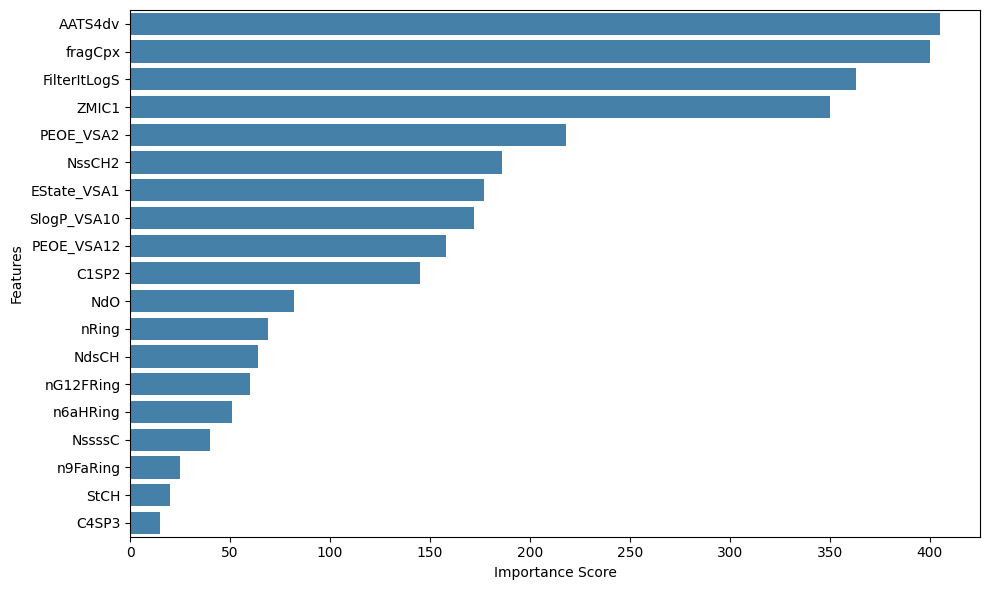

In [15]:
feature_importance = clf.feature_importances_

sorted_indices = feature_importance.argsort()[::-1]
sorted_importance = feature_importance[sorted_indices]
sorted_feature_names = X_train.columns[sorted_indices]

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importance, y=sorted_feature_names, orient='h', color="#3483BA")
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()